In [32]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential, layers


In [33]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [34]:
X_train.shape

## 3d array : 60000 images and each image is of 28*28

(60000, 28, 28)

In [35]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

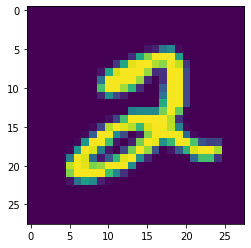

In [36]:
import matplotlib.pyplot as plt
plt.imshow(X_train[5])

In [37]:
## lets normalize the values

X_train = X_train/255
X_test = X_test/255

## X_train[0]

In [38]:
X_train.shape

## its in 2d , we need to bring it in a 1D array
## that is we will need to flatten it

(60000, 28, 28)

In [39]:
model = Sequential()
model.add(layers.Flatten(input_shape = (28,28)))
model.add(layers.Dense(128,activation ='relu')) 
## here no need to mention anything regarding the input numbers
## since flattens output is been given to dense
model.add(layers.Dense(30,activation ='relu')) 

## whenever more than one node in the classification, you will use softmax function

model.add(layers.Dense(10,activation ='softmax')) 



In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 30)                3870      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                310       
Total params: 104,660
Trainable params: 104,660
Non-trainable params: 0
_________________________________________________________________


In [41]:
## whats the difference between sparse_categorical_crossentropy and just categorical_crossentropy
## in this you dont need to label your target variable into one-hot-encoding
import tensorflow as tf
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [42]:
with tf.device('/gpu:0'):
    history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 5s 111us/sample - loss: 0.7425 - accuracy: 0.8009 - val_loss: 0.3384 - val_accuracy: 0.9043
Epoch 2/25
48000/48000 [==============================] - 5s 100us/sample - loss: 0.3249 - accuracy: 0.9070 - val_loss: 0.2748 - val_accuracy: 0.9205
Epoch 3/25
48000/48000 [==============================] - 5s 97us/sample - loss: 0.2694 - accuracy: 0.9223 - val_loss: 0.2412 - val_accuracy: 0.9327
Epoch 4/25
48000/48000 [==============================] - 5s 95us/sample - loss: 0.2345 - accuracy: 0.9328 - val_loss: 0.2164 - val_accuracy: 0.9399
Epoch 5/25
48000/48000 [==============================] - 5s 97us/sample - loss: 0.2085 - accuracy: 0.9403 - val_loss: 0.1980 - val_accuracy: 0.9434
Epoch 6/25
48000/48000 [==============================] - 5s 96us/sample - loss: 0.1888 - accuracy: 0.9455 - val_loss: 0.1844 - val_accuracy: 0.9466
Epoch 7/25
48000/48000 [==============================

In [23]:
y_pred = model.predict(X_test)
## will give the probability of the same
## so we need to get the number which has maximum value

y_pred = y_pred.argmax(axis=1)

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.971

Text(0.5, 1.0, 'Loss vs Val-Loss')

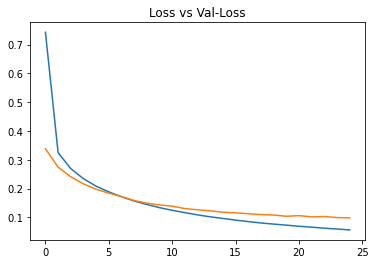

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss vs Val-Loss")

Text(0.5, 1.0, 'accuracy vs val-accuracy')

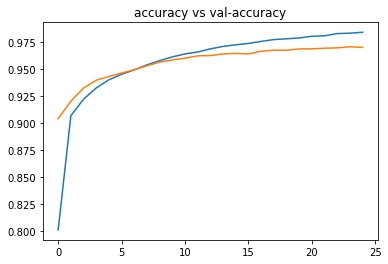

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("accuracy vs val-accuracy")

2


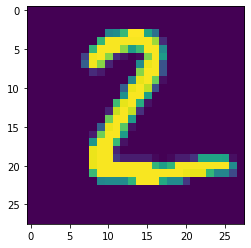

In [45]:
plt.imshow(X_test[1])

print(y_pred[1])

## our model predicted correctly

7

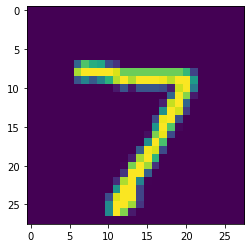

In [46]:
## prediction model

## we need to reshape the image
## so single image which is 28*28 : so (1,28,28)

plt.imshow(X_test[0])
model.predict(X_test[0].reshape(1,28,28)).argmax()

## Model is predicting 7 and image is also 7